### We begin with boilerplate:

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
plt.rcParams["figure.figsize"] = [12, 5]

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import random
import pandas as pd
import os
import sys

In [4]:
import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.INFO)

In [5]:
# point at library; I need some lessons on doing good PYTHONPATHs:
REPO_DIR = os.path.dirname(os.getcwd())
sys.path.append(os.path.join(REPO_DIR, 'lib'))
DATA_PATH = os.path.join(REPO_DIR, 'data')

# Covid epidemic simulator

In [6]:
from disease import Covid
from outbreak import Outbreak
from population.networks.household_workplace import HouseholdWorkplacePopulation
from population.networks.city import CityPopulation
from population.networks.city_config.city_cfg import POPULATION_LEEDS
from population.covid import PersonCovid
import society
import config

2021-01-22 21:57:21,109 INFO:Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2021-01-22 21:57:21,110 INFO:NumExpr defaulting to 8 threads.


### Baseline config of the simulation

In [7]:
config.print_baseline_config()

DAILY_TEST_CAPACITY_PER_HEAD 0.0075
DAYS_BEFORE_INFECTIOUS 4
DAYS_INFECTIOUS_TO_SYMPTOMS 2
DAYS_OF_SYMPTOMS 5
DURATION_OF_ISOLATION 10
MEAN_NETWORK_SIZE 9.0
PROB_APPLY_FOR_TEST_IF_SYMPTOMS 0.75
PROB_GET_TEST_IF_TRACED 0.75
PROB_INFECT_IF_TOGETHER_ON_A_DAY 0.025
PROB_ISOLATE_IF_SYMPTOMS 0.75
PROB_ISOLATE_IF_TESTPOS 0.3
PROB_ISOLATE_IF_TRACED 0.3
PROB_NON_C19_SYMPTOMS_PER_DAY 0.01
PROB_SYMPTOMATIC 0.6
PROB_TEST_IF_REQUESTED 1
PROB_TRACING_GIVEN_CONTACT 0.6000000000000001
SIMULATOR_PERIODS_PER_DAY 1
TEST_DAYS_ELAPSED 1
_PROPORTION_OF_INFECTED_WHO_GET_TESTED 0.44999999999999996
_TARGET_R0 1.4


We are going to work with a small town of a few thousand people.

In [8]:
#pop = HouseholdWorkplacePopulation(56000, society.Society(), person_type=PersonCovid)
pop = CityPopulation(POPULATION_LEEDS, society.Society(), person_type=PersonCovid)

2021-01-22 21:57:34,497 INFO:Building a set of 317255 households from which to build a population
2021-01-22 21:57:40,292 INFO:number of households generated: 317255
2021-01-22 21:57:40,293 INFO:longitude: -1.5646361 latitude: 53.82700139999999
2021-01-22 22:10:16,286 INFO:306117 households of mean size 2.59
2021-01-22 22:10:17,027 INFO:Only putting children >12 years old into classrooms.
2021-01-22 22:10:17,176 INFO:1902 classrooms of mean size 30.94
2021-01-22 22:10:17,480 INFO:121 care_homes of mean size 107.84
2021-01-22 22:10:18,401 INFO:94263 workplaces of mean size 5.60
2021-01-22 22:10:18,455 INFO:Adding 402403 permanent contact groups
2021-01-22 22:10:18,564 INFO:Adding 39657 ephemeral contact pairs


Randomly, we put them into fixed and overlapping social groupings, where each person has a small network.

In [9]:
nets = [len(p.contacts) for p in pop.people]

In [10]:
np.mean(nets)

13.172626740079608

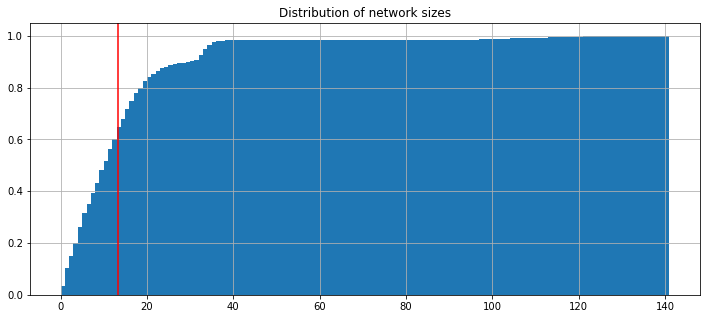

In [11]:
plt.hist(nets, cumulative=True, density=True, bins=2000)
plt.title('Distribution of network sizes')
plt.axvline(np.mean(nets), color='r')
plt.grid()

### Finally ready to simulate:

We will place the population that we have created, into various settings and societies in the upcoming simulations

In [12]:
POP_SIZE = POPULATION_LEEDS
PREVALENCE = 1/560 * 4
SCALE_SETTINGS = dict(n_days = 201, pop_size = POP_SIZE, seed_size = int(POP_SIZE*PREVALENCE), population=pop)
SCALE_SETTINGS

{'n_days': 201,
 'pop_size': 793139,
 'seed_size': 5665,
 'population': <population.networks.city.CityPopulation at 0x7ff7bf3e8cd0>}

Our baseline simulation is of a runaway infection.

We start with 400 people infected in a population of 56,000.

We begin by studying a society where people don't know whether or how to self-isolate:

2021-01-22 22:10:34,137 WARNING:Using a pre-existing population - does it have the right network structure?
2021-01-22 22:10:44,375 INFO:Day 1, prop infected is 0.01, prop infectious is 0.0051


<Figure size 864x360 with 0 Axes>

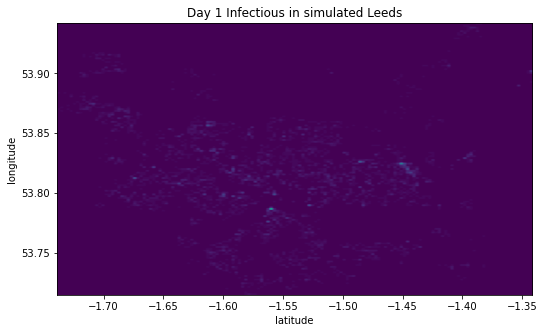

2021-01-22 22:11:14,594 INFO:Day 15, prop infected is 0.06, prop infectious is 0.0267


<Figure size 864x360 with 0 Axes>

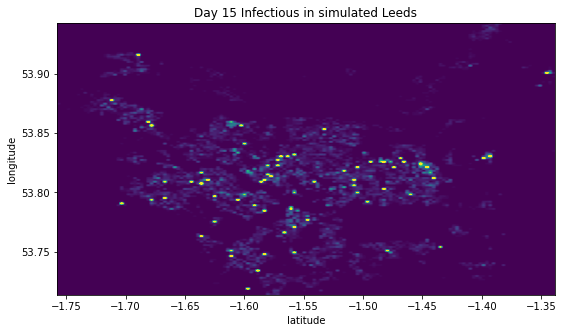

2021-01-22 22:11:42,878 INFO:Day 29, prop infected is 0.17, prop infectious is 0.0531


<Figure size 864x360 with 0 Axes>

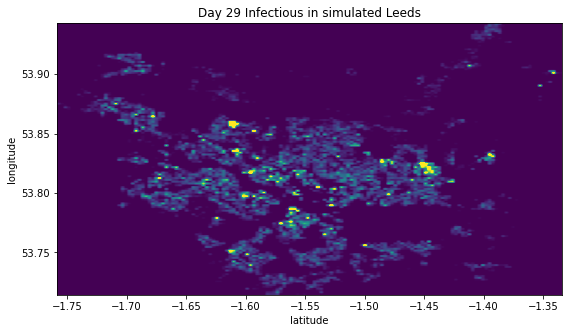

2021-01-22 22:12:12,898 INFO:Day 43, prop infected is 0.34, prop infectious is 0.0859


<Figure size 864x360 with 0 Axes>

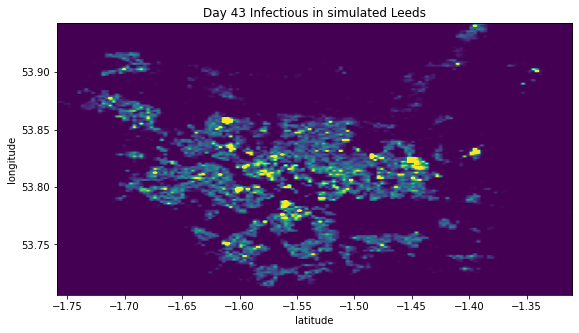

2021-01-22 22:12:42,658 INFO:Day 57, prop infected is 0.47, prop infectious is 0.0686


<Figure size 864x360 with 0 Axes>

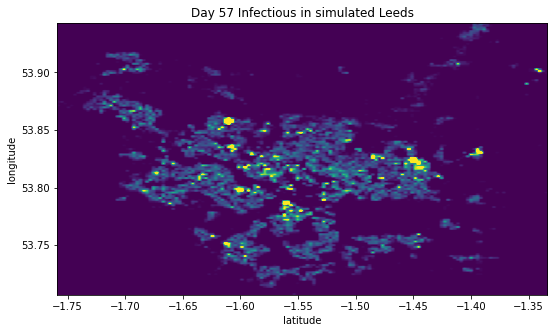

2021-01-22 22:13:09,792 INFO:Day 71, prop infected is 0.54, prop infectious is 0.0324


<Figure size 864x360 with 0 Axes>

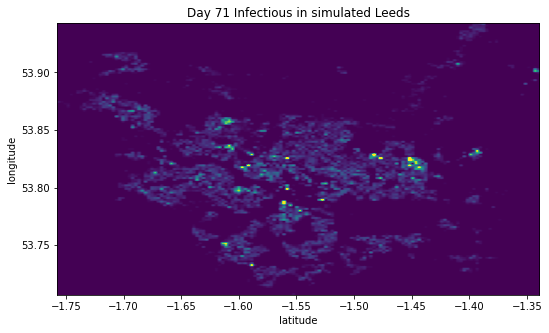

2021-01-22 22:13:35,543 INFO:Day 85, prop infected is 0.56, prop infectious is 0.0116


<Figure size 864x360 with 0 Axes>

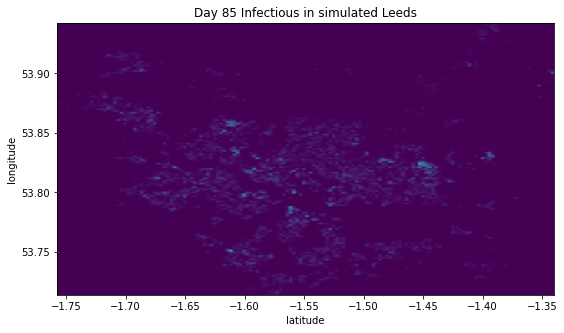

2021-01-22 22:14:00,323 INFO:Day 99, prop infected is 0.57, prop infectious is 0.0039


<Figure size 864x360 with 0 Axes>

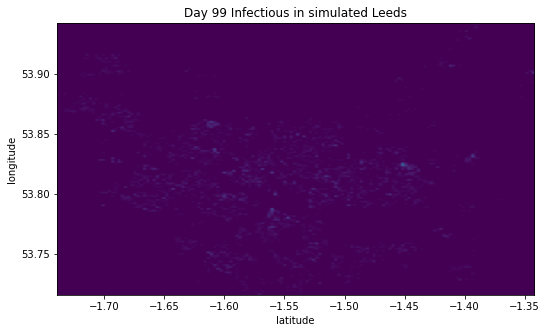

2021-01-22 22:14:24,536 INFO:Day 113, prop infected is 0.57, prop infectious is 0.0012


<Figure size 864x360 with 0 Axes>

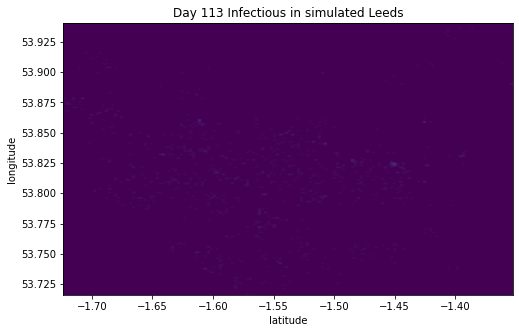

2021-01-22 22:14:47,410 INFO:Day 127, prop infected is 0.57, prop infectious is 0.0004


<Figure size 864x360 with 0 Axes>

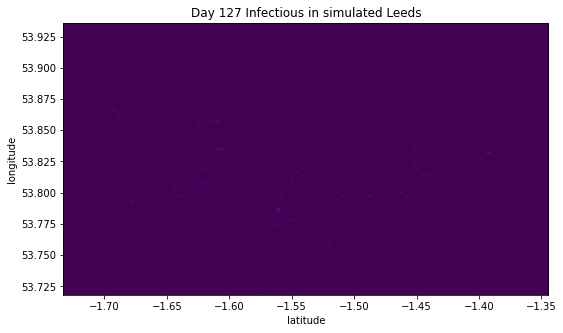

2021-01-22 22:15:11,819 INFO:Day 141, prop infected is 0.57, prop infectious is 0.0001


<Figure size 864x360 with 0 Axes>

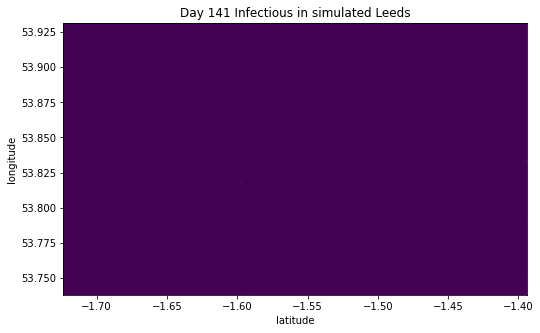

2021-01-22 22:15:37,809 INFO:Day 155, prop infected is 0.57, prop infectious is 0.0000


<Figure size 864x360 with 0 Axes>

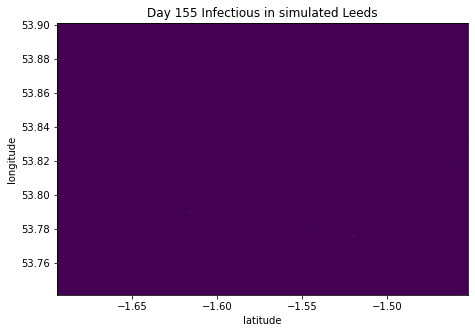

2021-01-22 22:16:01,730 INFO:Day 169, prop infected is 0.57, prop infectious is 0.0000


<Figure size 864x360 with 0 Axes>

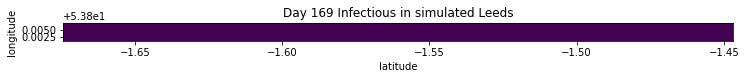

2021-01-22 22:16:25,022 INFO:Day 183, prop infected is 0.57, prop infectious is 0.0000
2021-01-22 22:16:48,175 INFO:Day 197, prop infected is 0.57, prop infectious is 0.0000
2021-01-22 22:16:54,632 INFO:Day 201, prop infected is 0.57, prop infectious is 0.0000


In [13]:
s_basic = society.Society(config=dict(PROB_ISOLATE_IF_SYMPTOMS = 0))
o_basic = Outbreak(s_basic, Covid(), **SCALE_SETTINGS).simulate()

2021-01-22 22:16:55,930 INFO: Realized R0 of early infections is 1.48
2021-01-22 22:16:55,930 INFO: 57.3 percent of the proportion was infected during the epidemic


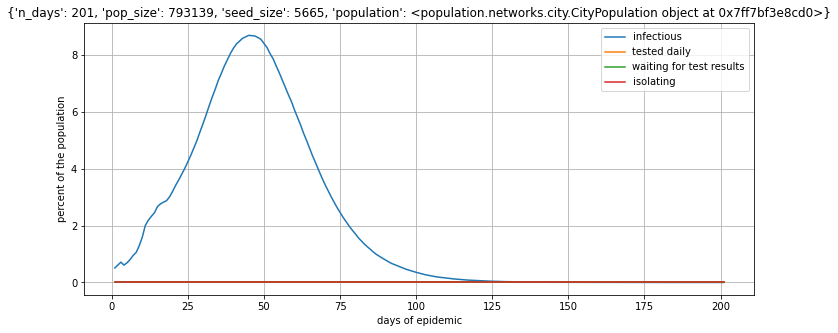

In [14]:
o_basic.plot(title=str(SCALE_SETTINGS))

Lets put that on a log scale:

2021-01-22 22:16:56,207 INFO: Realized R0 of early infections is 1.48
2021-01-22 22:16:56,209 INFO: 57.3 percent of the proportion was infected during the epidemic


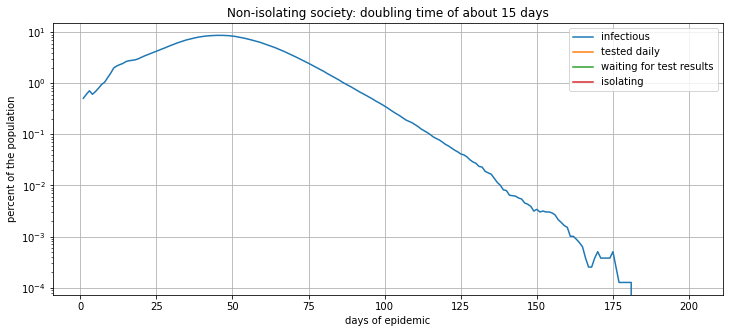

In [15]:
o_basic.plot(logy=True, title='Non-isolating society: doubling time of about 15 days')

Next, suppose that people know to isolate if they show symptoms, and 75% do so - this is similar to what is going on in the UK now:

2021-01-22 22:16:56,911 WARNING:Using a pre-existing population - does it have the right network structure?
2021-01-22 22:17:10,566 INFO:Day 1, prop infected is 0.01, prop infectious is 0.0051


<Figure size 864x360 with 0 Axes>

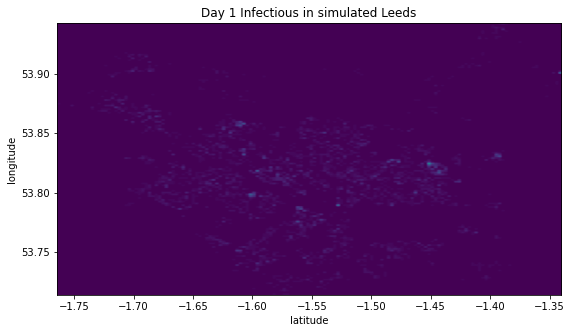

2021-01-22 22:17:37,100 INFO:Day 15, prop infected is 0.03, prop infectious is 0.0147


<Figure size 864x360 with 0 Axes>

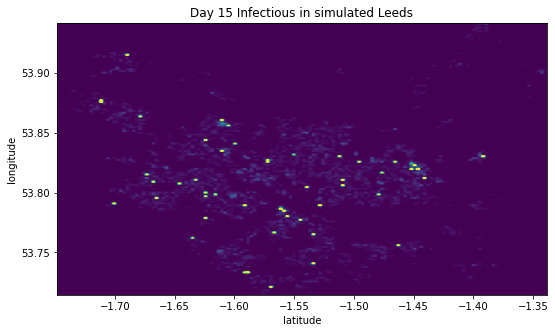

2021-01-22 22:18:04,384 INFO:Day 29, prop infected is 0.06, prop infectious is 0.0148


<Figure size 864x360 with 0 Axes>

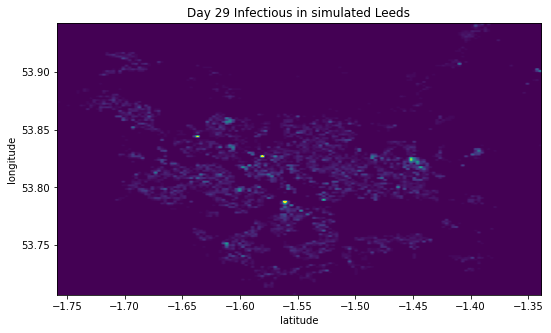

2021-01-22 22:18:32,108 INFO:Day 43, prop infected is 0.10, prop infectious is 0.0181


<Figure size 864x360 with 0 Axes>

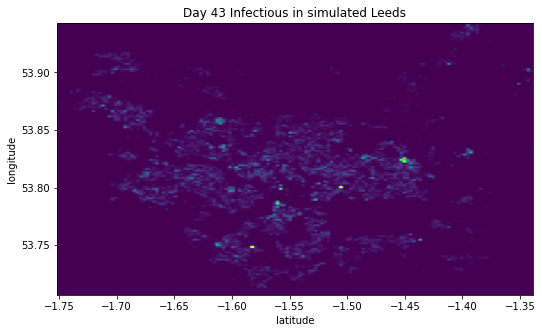

2021-01-22 22:18:59,728 INFO:Day 57, prop infected is 0.14, prop infectious is 0.0194


<Figure size 864x360 with 0 Axes>

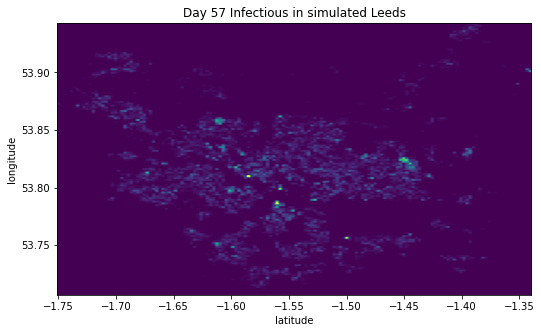

2021-01-22 22:19:27,479 INFO:Day 71, prop infected is 0.18, prop infectious is 0.0183


<Figure size 864x360 with 0 Axes>

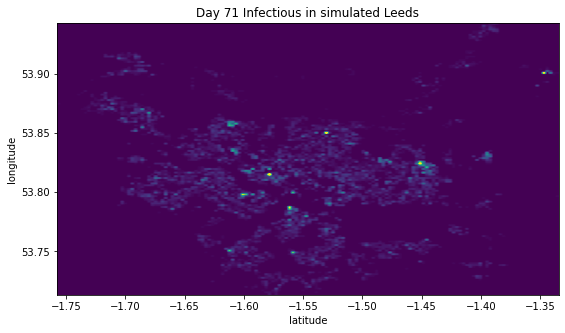

2021-01-22 22:19:55,091 INFO:Day 85, prop infected is 0.21, prop infectious is 0.0159


<Figure size 864x360 with 0 Axes>

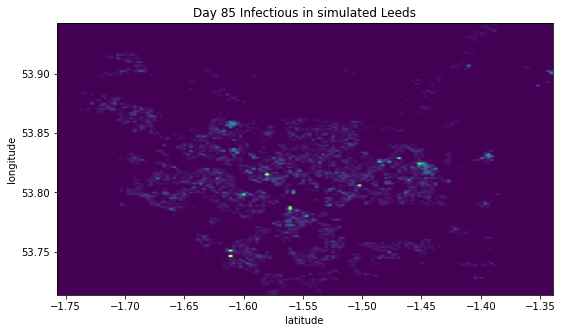

2021-01-22 22:20:22,249 INFO:Day 99, prop infected is 0.23, prop infectious is 0.0118


<Figure size 864x360 with 0 Axes>

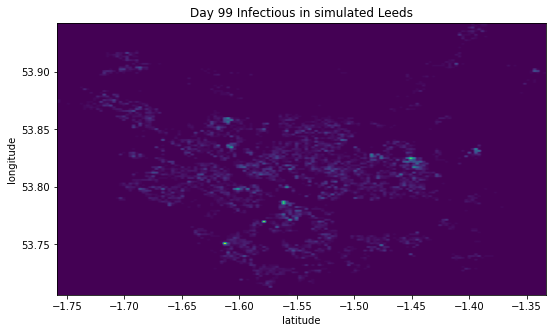

2021-01-22 22:20:49,181 INFO:Day 113, prop infected is 0.25, prop infectious is 0.0083


<Figure size 864x360 with 0 Axes>

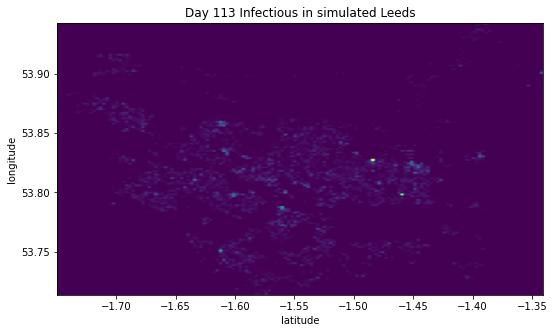

2021-01-22 22:21:14,906 INFO:Day 127, prop infected is 0.26, prop infectious is 0.0055


<Figure size 864x360 with 0 Axes>

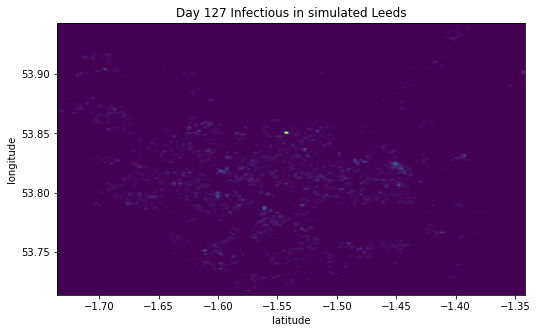

2021-01-22 22:21:41,233 INFO:Day 141, prop infected is 0.26, prop infectious is 0.0036


<Figure size 864x360 with 0 Axes>

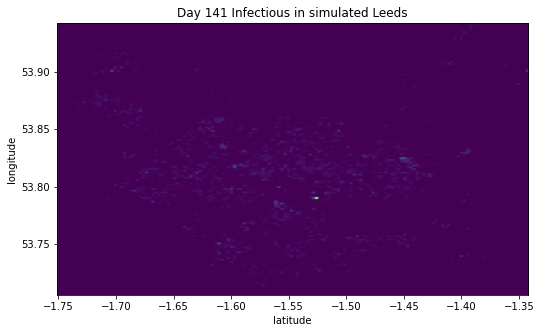

2021-01-22 22:22:06,836 INFO:Day 155, prop infected is 0.27, prop infectious is 0.0020


<Figure size 864x360 with 0 Axes>

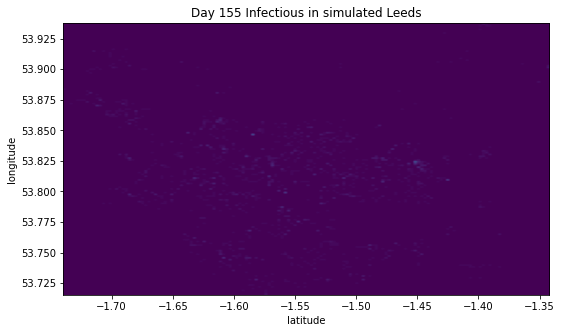

2021-01-22 22:22:32,474 INFO:Day 169, prop infected is 0.27, prop infectious is 0.0014


<Figure size 864x360 with 0 Axes>

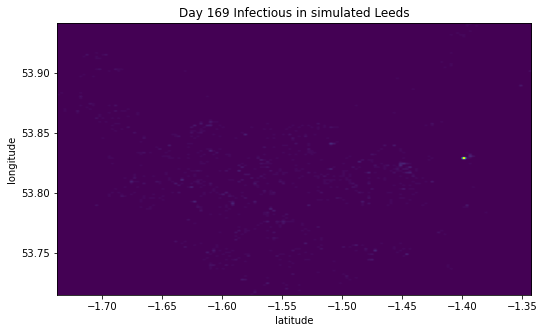

2021-01-22 22:22:57,847 INFO:Day 183, prop infected is 0.27, prop infectious is 0.0006


<Figure size 864x360 with 0 Axes>

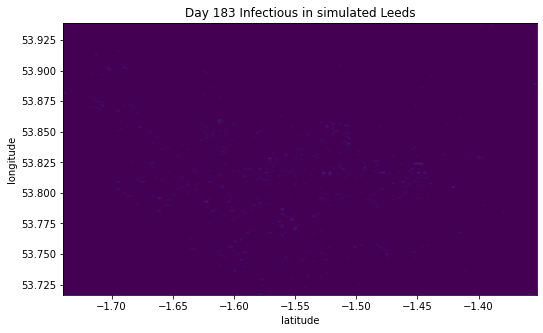

2021-01-22 22:23:23,478 INFO:Day 197, prop infected is 0.27, prop infectious is 0.0003


<Figure size 864x360 with 0 Axes>

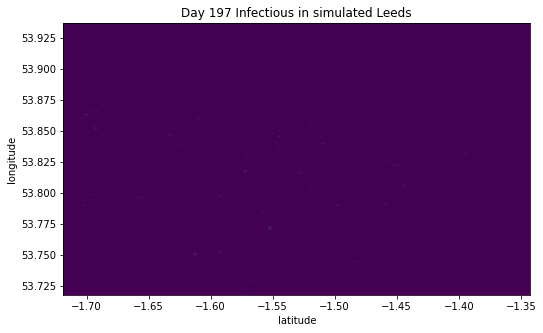

2021-01-22 22:23:31,053 INFO:Day 201, prop infected is 0.27, prop infectious is 0.0003


<Figure size 864x360 with 0 Axes>

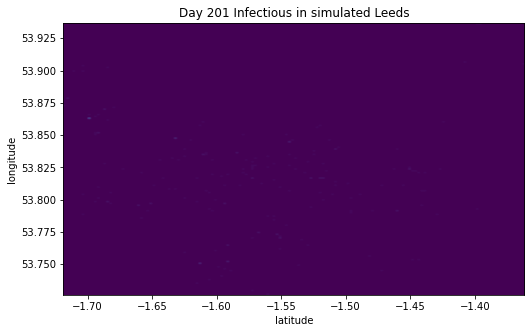

In [16]:
s_isolate = society.Society(config=dict(PROB_ISOLATE_IF_SYMPTOMS = 0.75))
o_isolate = Outbreak(s_isolate, Covid(), **SCALE_SETTINGS).simulate()

2021-01-22 22:23:32,234 INFO: Realized R0 of early infections is 1.16
2021-01-22 22:23:32,235 INFO: 27.4 percent of the proportion was infected during the epidemic


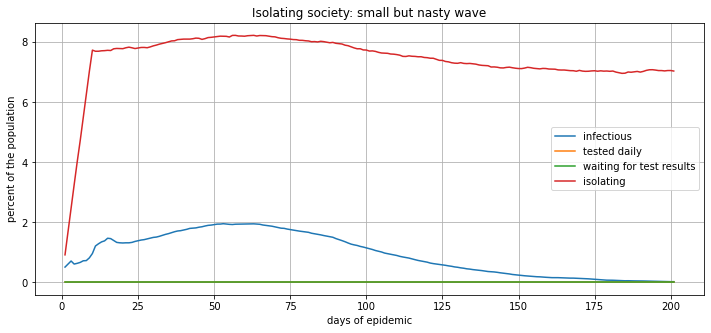

In [17]:
o_isolate.plot(title='Isolating society: small but nasty wave')

So, now we can add testing:
 * initially, here, lets suppose that positive test results are just ignored, while -ve results let people out of isolation:

2021-01-22 22:23:32,439 WARNING:Using a pre-existing population - does it have the right network structure?
2021-01-22 22:23:47,110 INFO:Day 1, prop infected is 0.01, prop infectious is 0.0050


<Figure size 864x360 with 0 Axes>

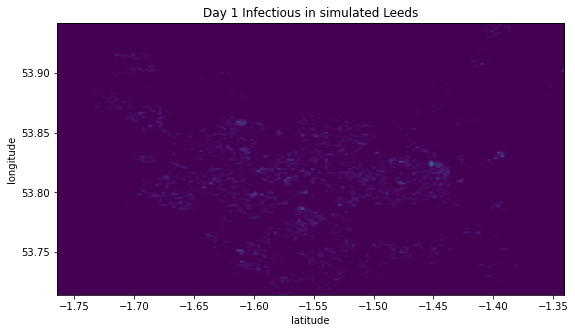

2021-01-22 22:24:19,035 INFO:Day 15, prop infected is 0.04, prop infectious is 0.0158


<Figure size 864x360 with 0 Axes>

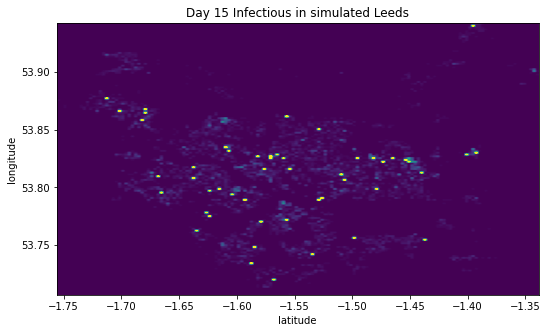

2021-01-22 22:24:51,656 INFO:Day 29, prop infected is 0.07, prop infectious is 0.0183


<Figure size 864x360 with 0 Axes>

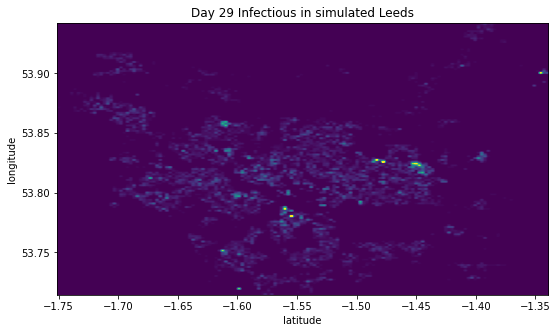

2021-01-22 22:25:23,682 INFO:Day 43, prop infected is 0.12, prop infectious is 0.0240


<Figure size 864x360 with 0 Axes>

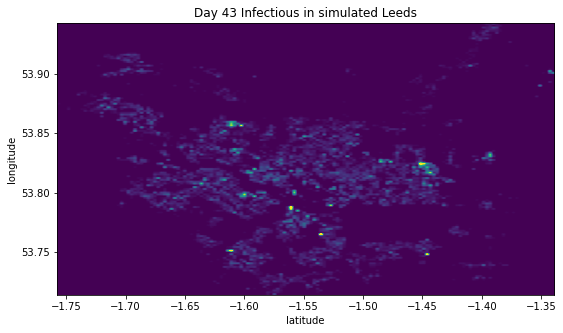

2021-01-22 22:25:58,737 INFO:Day 57, prop infected is 0.18, prop infectious is 0.0272


<Figure size 864x360 with 0 Axes>

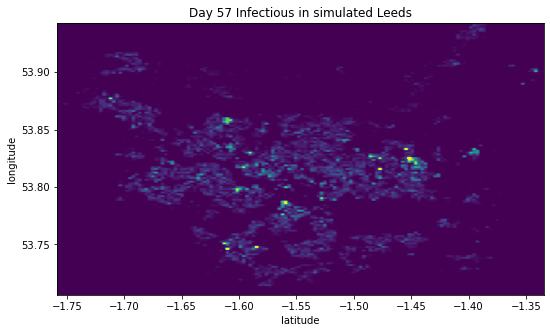

2021-01-22 22:26:30,427 INFO:Day 71, prop infected is 0.23, prop infectious is 0.0250


<Figure size 864x360 with 0 Axes>

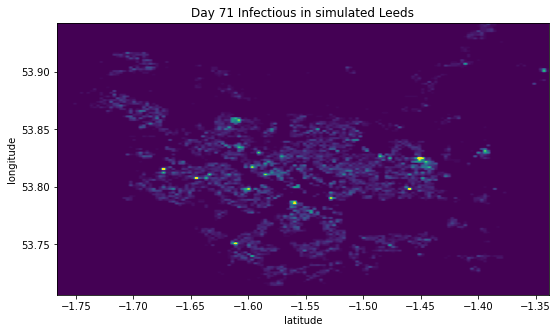

2021-01-22 22:27:01,159 INFO:Day 85, prop infected is 0.26, prop infectious is 0.0194


<Figure size 864x360 with 0 Axes>

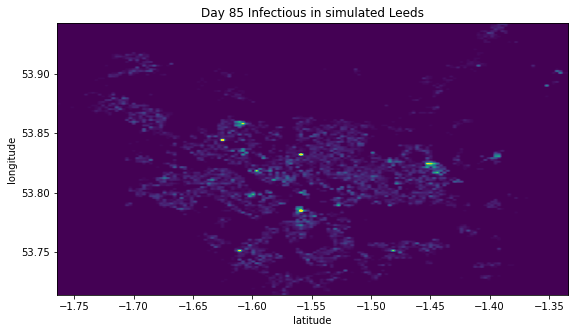

2021-01-22 22:27:30,920 INFO:Day 99, prop infected is 0.29, prop infectious is 0.0124


<Figure size 864x360 with 0 Axes>

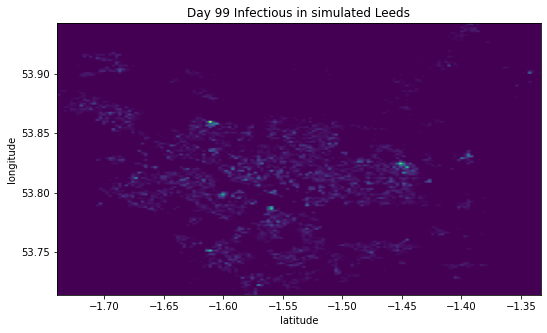

2021-01-22 22:28:00,292 INFO:Day 113, prop infected is 0.30, prop infectious is 0.0074


<Figure size 864x360 with 0 Axes>

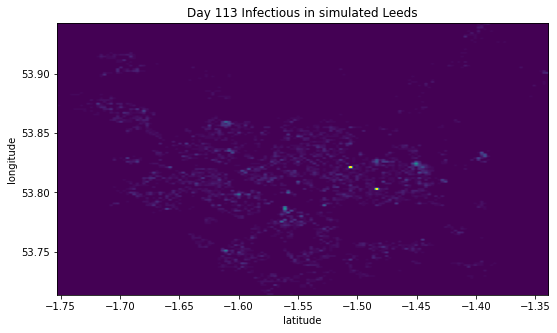

2021-01-22 22:28:32,369 INFO:Day 127, prop infected is 0.31, prop infectious is 0.0043


<Figure size 864x360 with 0 Axes>

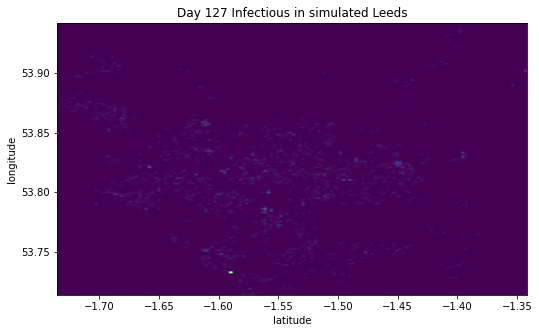

2021-01-22 22:29:00,648 INFO:Day 141, prop infected is 0.32, prop infectious is 0.0023


<Figure size 864x360 with 0 Axes>

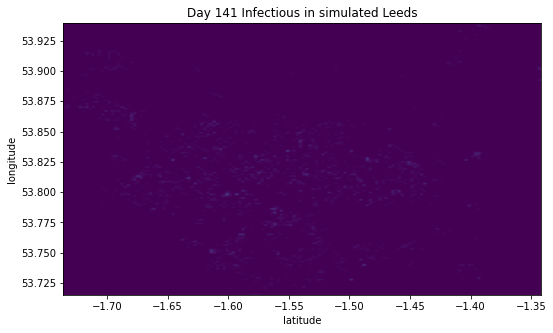

2021-01-22 22:29:29,500 INFO:Day 155, prop infected is 0.32, prop infectious is 0.0013


<Figure size 864x360 with 0 Axes>

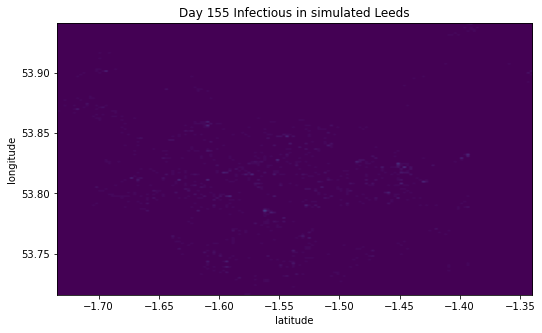

2021-01-22 22:29:57,850 INFO:Day 169, prop infected is 0.32, prop infectious is 0.0008


<Figure size 864x360 with 0 Axes>

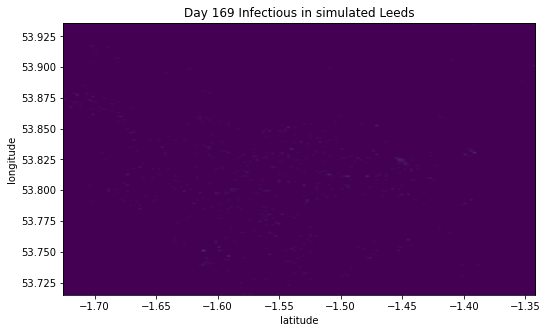

2021-01-22 22:30:25,992 INFO:Day 183, prop infected is 0.32, prop infectious is 0.0004


<Figure size 864x360 with 0 Axes>

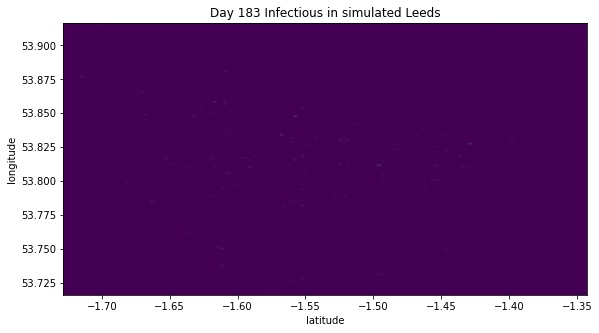

2021-01-22 22:30:54,174 INFO:Day 197, prop infected is 0.32, prop infectious is 0.0002


<Figure size 864x360 with 0 Axes>

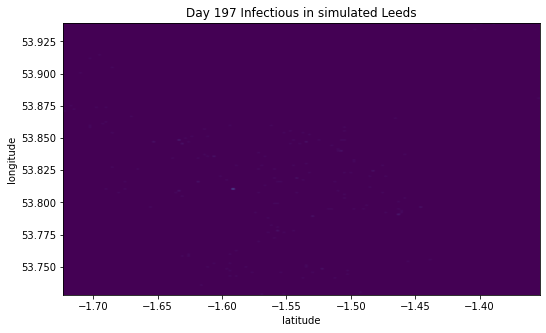

2021-01-22 22:31:02,600 INFO:Day 201, prop infected is 0.32, prop infectious is 0.0002


<Figure size 864x360 with 0 Axes>

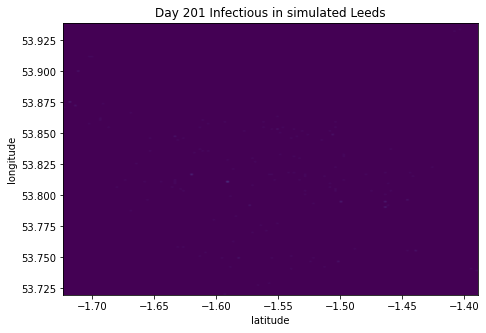

In [18]:
s_testignored = society.TestingSociety(config=dict(PROB_ISOLATE_IF_TESTPOS=0))
o_testignored = Outbreak(s_testignored, Covid(), **SCALE_SETTINGS).simulate()

2021-01-22 22:31:03,915 INFO: Realized R0 of early infections is 1.20
2021-01-22 22:31:03,916 INFO: 32.2 percent of the proportion was infected during the epidemic


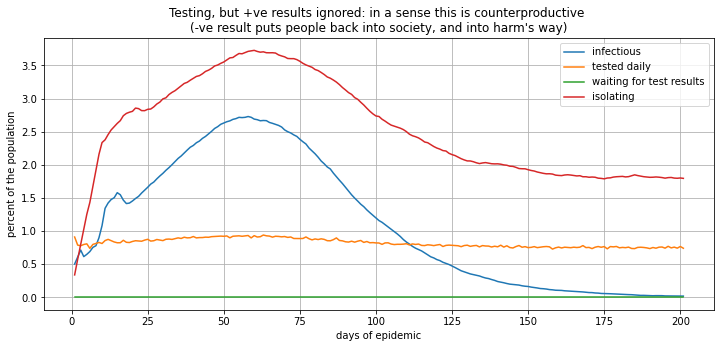

In [19]:
o_testignored.plot(title="Testing, but +ve results ignored: in a sense this is counterproductive \n"
                         "(-ve result puts people back into society, and into harm's way)")

 * Now suppose that people respond to test results, some of the time:

2021-01-22 22:31:04,143 WARNING:Using a pre-existing population - does it have the right network structure?
2021-01-22 22:31:20,041 INFO:Day 1, prop infected is 0.01, prop infectious is 0.0050


<Figure size 864x360 with 0 Axes>

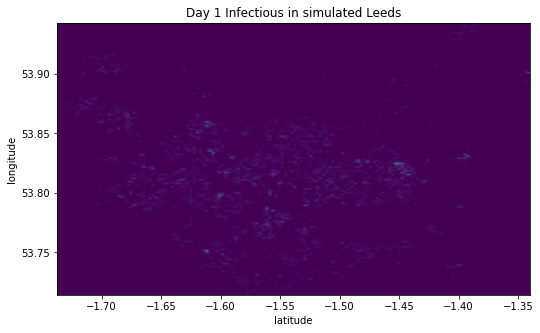

2021-01-22 22:31:51,910 INFO:Day 15, prop infected is 0.04, prop infectious is 0.0164


<Figure size 864x360 with 0 Axes>

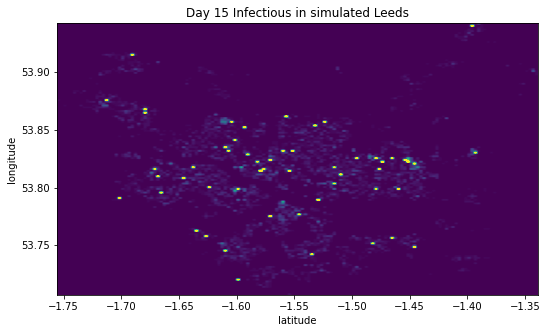

2021-01-22 22:32:23,756 INFO:Day 29, prop infected is 0.07, prop infectious is 0.0170


<Figure size 864x360 with 0 Axes>

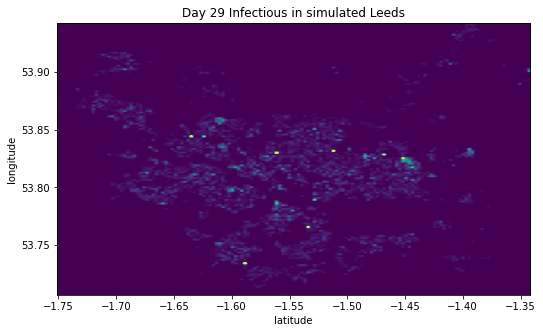

2021-01-22 22:32:55,724 INFO:Day 43, prop infected is 0.11, prop infectious is 0.0215


<Figure size 864x360 with 0 Axes>

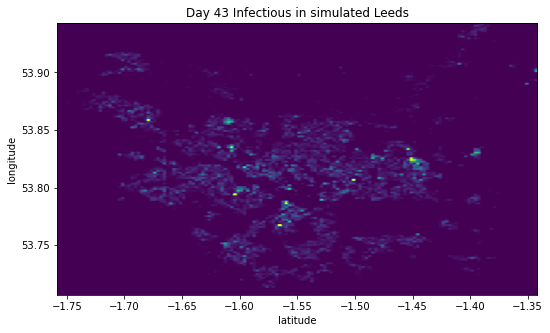

2021-01-22 22:33:27,462 INFO:Day 57, prop infected is 0.16, prop infectious is 0.0240


<Figure size 864x360 with 0 Axes>

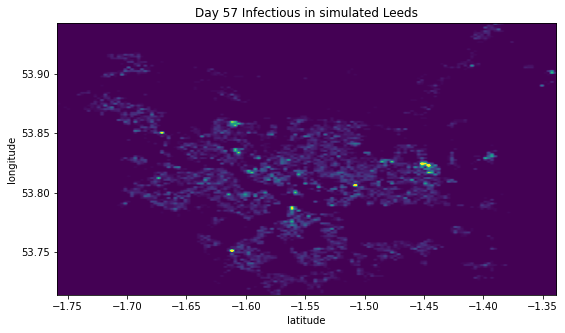

2021-01-22 22:33:58,657 INFO:Day 71, prop infected is 0.21, prop infectious is 0.0219


<Figure size 864x360 with 0 Axes>

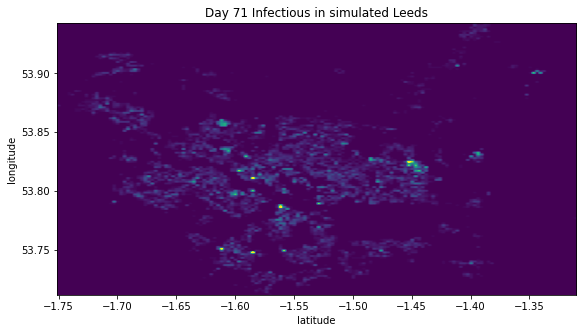

2021-01-22 22:34:33,329 INFO:Day 85, prop infected is 0.24, prop infectious is 0.0173


<Figure size 864x360 with 0 Axes>

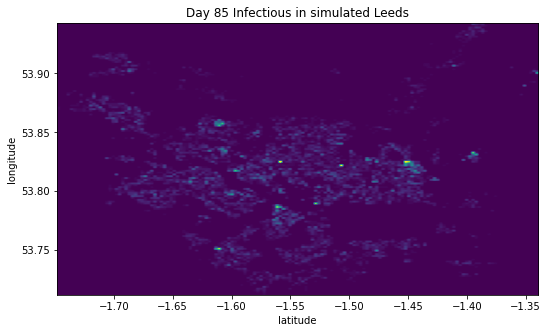

2021-01-22 22:35:02,664 INFO:Day 99, prop infected is 0.26, prop infectious is 0.0117


<Figure size 864x360 with 0 Axes>

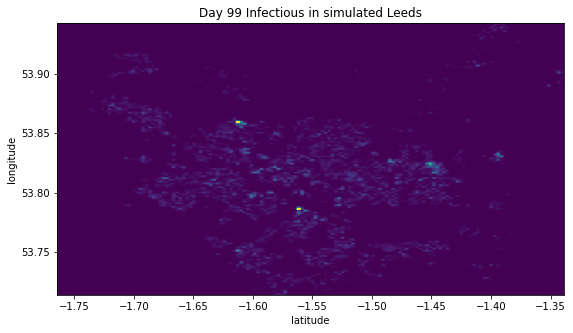

2021-01-22 22:35:31,188 INFO:Day 113, prop infected is 0.28, prop infectious is 0.0079


<Figure size 864x360 with 0 Axes>

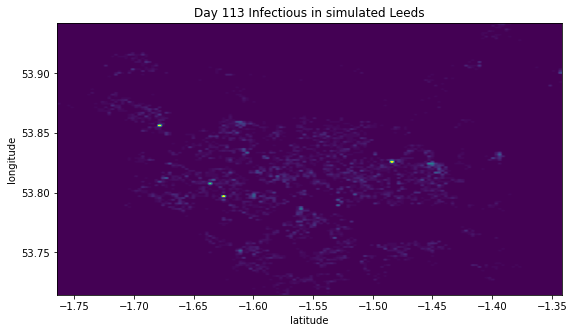

2021-01-22 22:35:59,427 INFO:Day 127, prop infected is 0.29, prop infectious is 0.0048


<Figure size 864x360 with 0 Axes>

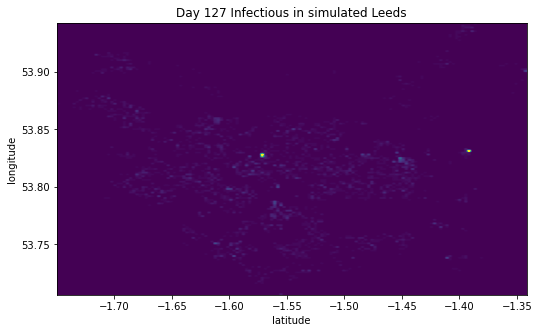

2021-01-22 22:36:28,053 INFO:Day 141, prop infected is 0.29, prop infectious is 0.0028


<Figure size 864x360 with 0 Axes>

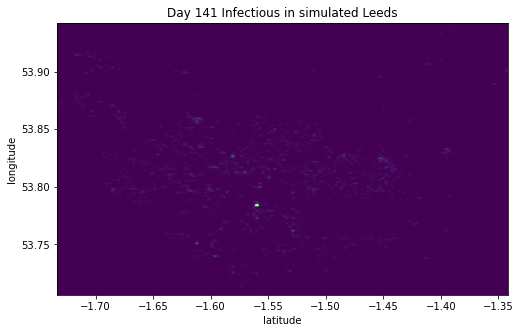

2021-01-22 22:36:56,628 INFO:Day 155, prop infected is 0.30, prop infectious is 0.0014


<Figure size 864x360 with 0 Axes>

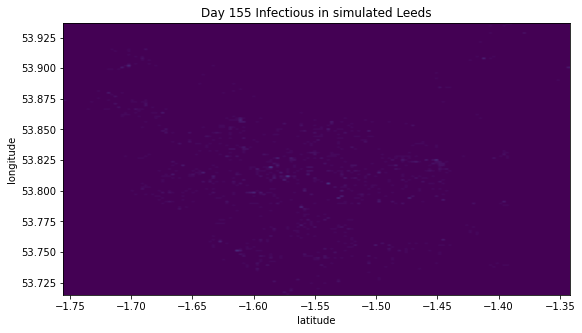

2021-01-22 22:37:24,706 INFO:Day 169, prop infected is 0.30, prop infectious is 0.0008


<Figure size 864x360 with 0 Axes>

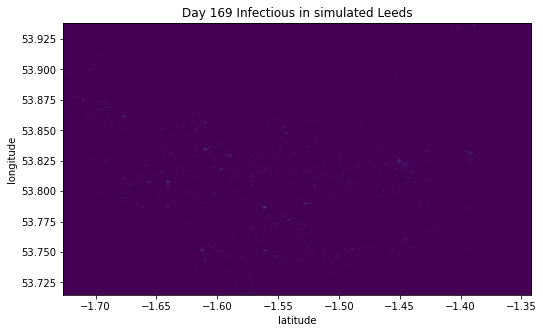

2021-01-22 22:37:58,481 INFO:Day 183, prop infected is 0.30, prop infectious is 0.0005


<Figure size 864x360 with 0 Axes>

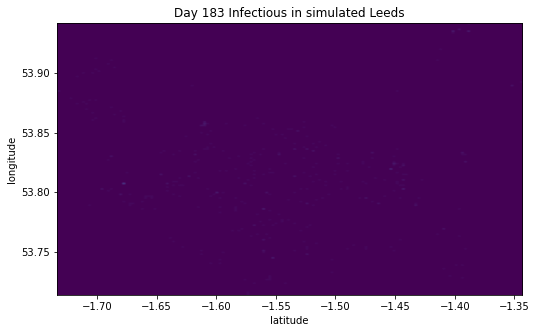

2021-01-22 22:38:26,831 INFO:Day 197, prop infected is 0.30, prop infectious is 0.0003


<Figure size 864x360 with 0 Axes>

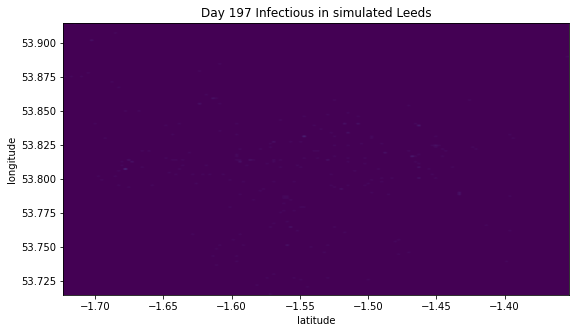

2021-01-22 22:38:35,374 INFO:Day 201, prop infected is 0.30, prop infectious is 0.0002


<Figure size 864x360 with 0 Axes>

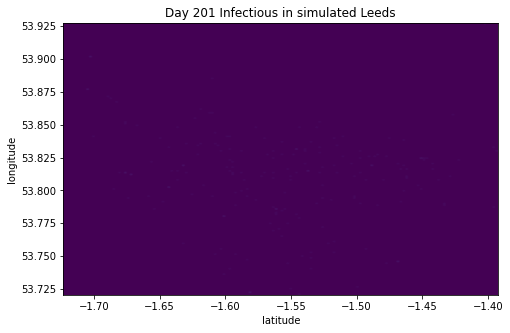

In [20]:
o_test = Outbreak(society.TestingSociety(), Covid(), **SCALE_SETTINGS).simulate()

2021-01-22 22:38:36,663 INFO: Realized R0 of early infections is 1.18
2021-01-22 22:38:36,664 INFO: 30.0 percent of the proportion was infected during the epidemic


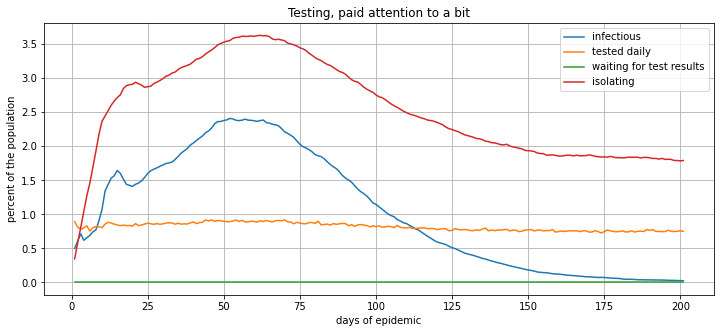

In [21]:
o_test.plot(title="Testing, paid attention to a bit")

We add contact-tracing and isolation:

2021-01-22 22:38:36,894 WARNING:Using a pre-existing population - does it have the right network structure?
2021-01-22 22:38:49,550 INFO:Day 1, prop infected is 0.01, prop infectious is 0.0051


<Figure size 864x360 with 0 Axes>

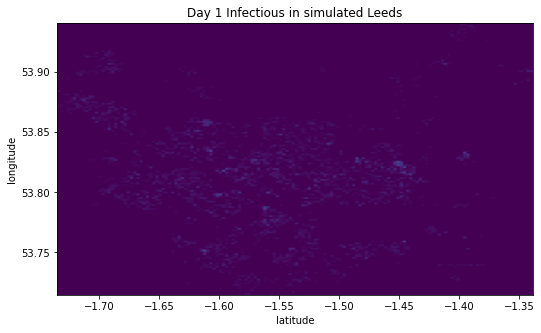

2021-01-22 22:39:21,557 INFO:Day 15, prop infected is 0.03, prop infectious is 0.0117


<Figure size 864x360 with 0 Axes>

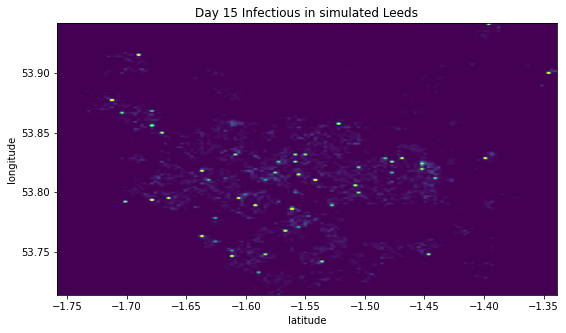

2021-01-22 22:39:57,012 INFO:Day 29, prop infected is 0.04, prop infectious is 0.0068


<Figure size 864x360 with 0 Axes>

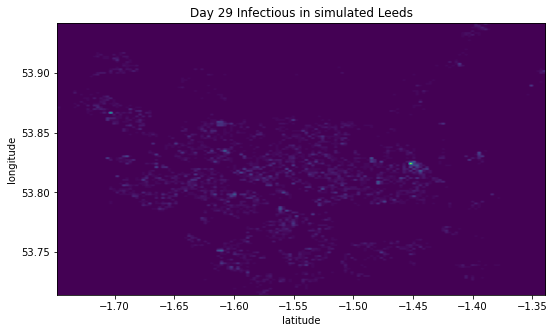

2021-01-22 22:40:27,564 INFO:Day 43, prop infected is 0.05, prop infectious is 0.0060


<Figure size 864x360 with 0 Axes>

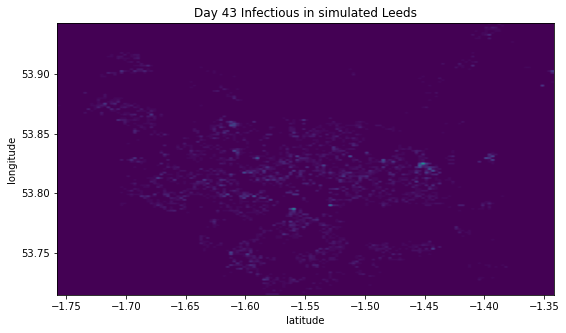

2021-01-22 22:40:57,920 INFO:Day 57, prop infected is 0.06, prop infectious is 0.0049


<Figure size 864x360 with 0 Axes>

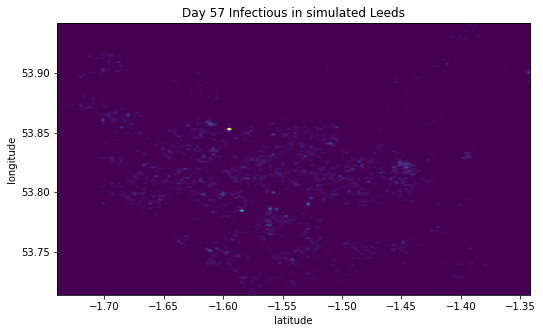

2021-01-22 22:41:27,908 INFO:Day 71, prop infected is 0.07, prop infectious is 0.0040


<Figure size 864x360 with 0 Axes>

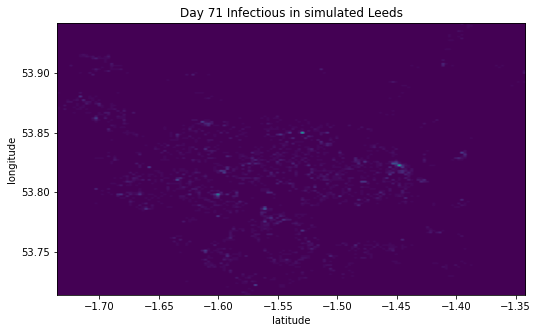

2021-01-22 22:41:57,333 INFO:Day 85, prop infected is 0.08, prop infectious is 0.0032


<Figure size 864x360 with 0 Axes>

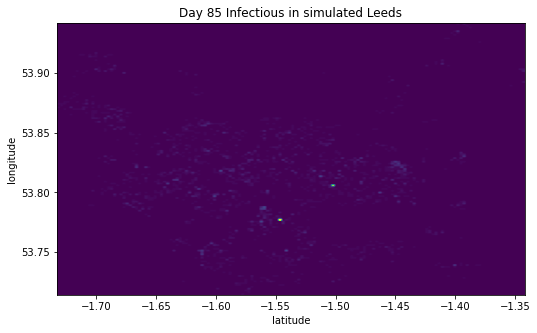

2021-01-22 22:42:26,701 INFO:Day 99, prop infected is 0.08, prop infectious is 0.0024


<Figure size 864x360 with 0 Axes>

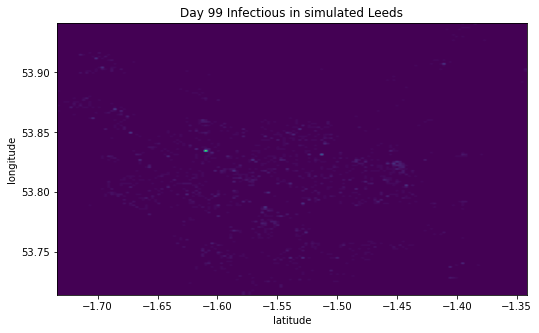

2021-01-22 22:43:00,869 INFO:Day 113, prop infected is 0.09, prop infectious is 0.0019


<Figure size 864x360 with 0 Axes>

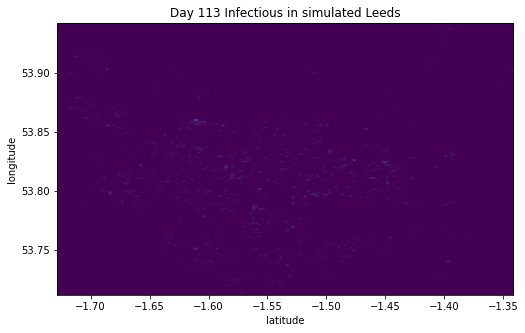

2021-01-22 22:43:29,955 INFO:Day 127, prop infected is 0.09, prop infectious is 0.0014


<Figure size 864x360 with 0 Axes>

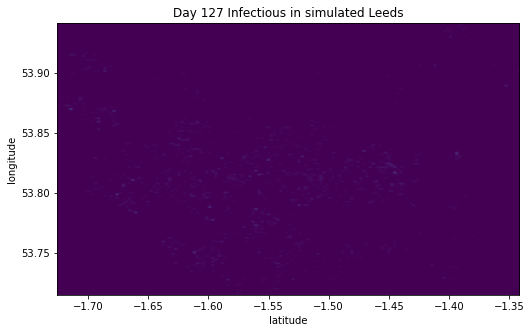

2021-01-22 22:43:58,852 INFO:Day 141, prop infected is 0.09, prop infectious is 0.0011


<Figure size 864x360 with 0 Axes>

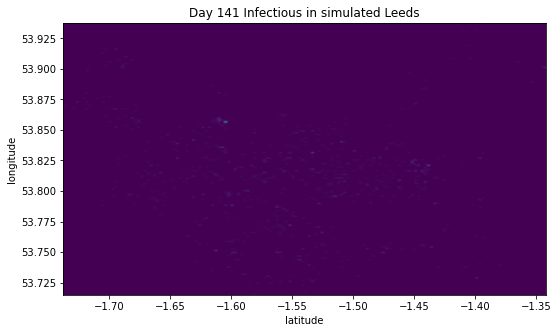

2021-01-22 22:44:27,624 INFO:Day 155, prop infected is 0.09, prop infectious is 0.0009


<Figure size 864x360 with 0 Axes>

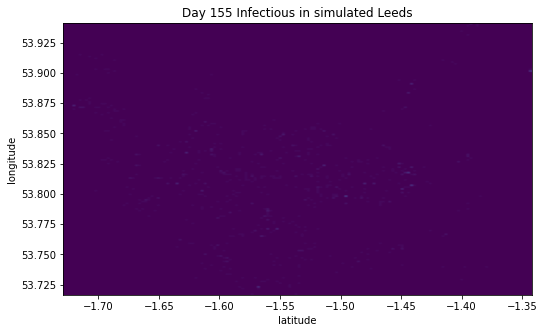

2021-01-22 22:44:56,594 INFO:Day 169, prop infected is 0.09, prop infectious is 0.0007


<Figure size 864x360 with 0 Axes>

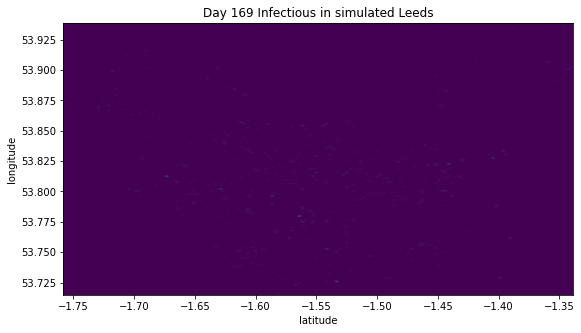

2021-01-22 22:45:25,628 INFO:Day 183, prop infected is 0.10, prop infectious is 0.0005


<Figure size 864x360 with 0 Axes>

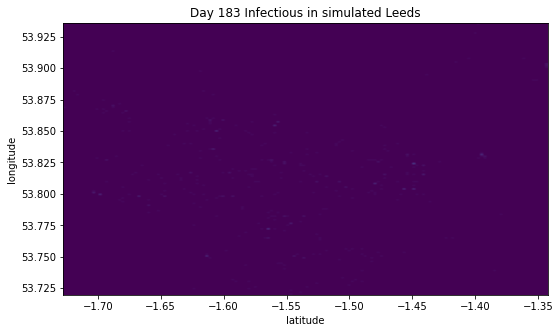

2021-01-22 22:45:53,827 INFO:Day 197, prop infected is 0.10, prop infectious is 0.0003


<Figure size 864x360 with 0 Axes>

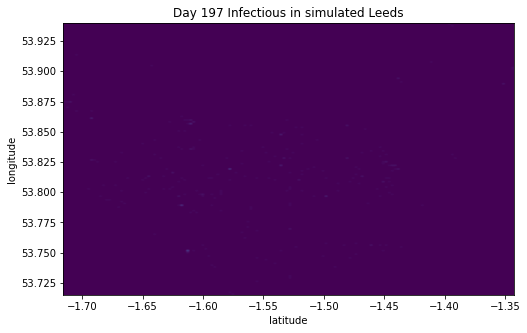

2021-01-22 22:46:02,104 INFO:Day 201, prop infected is 0.10, prop infectious is 0.0003


<Figure size 864x360 with 0 Axes>

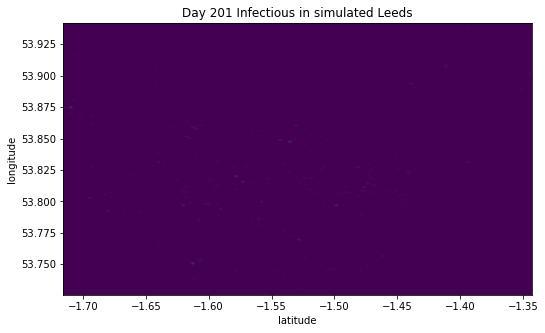

In [22]:
o_test_trace = Outbreak(society.TestingTracingSociety(), Covid(), **SCALE_SETTINGS).simulate()

2021-01-22 22:46:02,815 INFO: Realized R0 of early infections is 0.95
2021-01-22 22:46:02,816 INFO: 9.6 percent of the proportion was infected during the epidemic


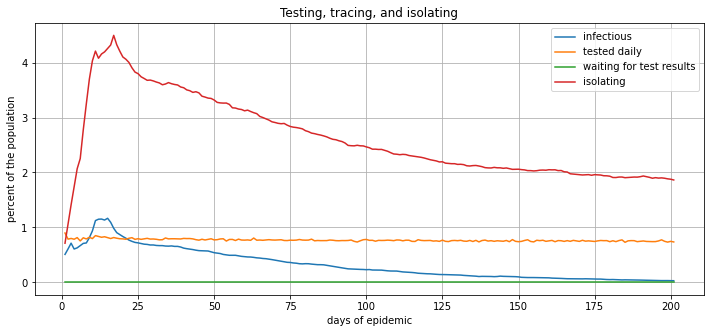

In [23]:
o_test_trace.plot(title='Testing, tracing, and isolating', secondary_y=['prop_infected'])

UK society, however, is characterized by testing bottlenecks:

2021-01-22 22:46:03,026 WARNING:Using a pre-existing population - does it have the right network structure?
2021-01-22 22:46:19,020 INFO:Day 1, prop infected is 0.01, prop infectious is 0.0051


<Figure size 864x360 with 0 Axes>

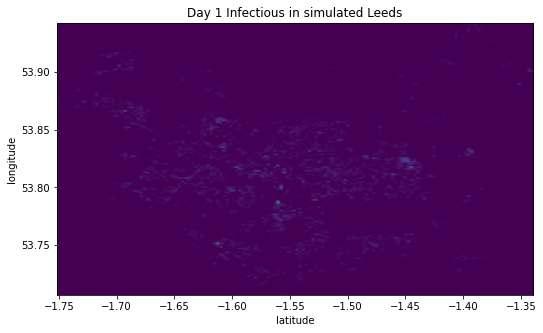

2021-01-22 22:46:50,482 INFO:Day 15, prop infected is 0.03, prop infectious is 0.0118


<Figure size 864x360 with 0 Axes>

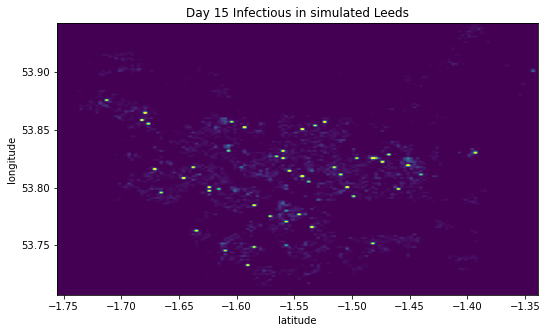

2021-01-22 22:47:22,110 INFO:Day 29, prop infected is 0.04, prop infectious is 0.0072


<Figure size 864x360 with 0 Axes>

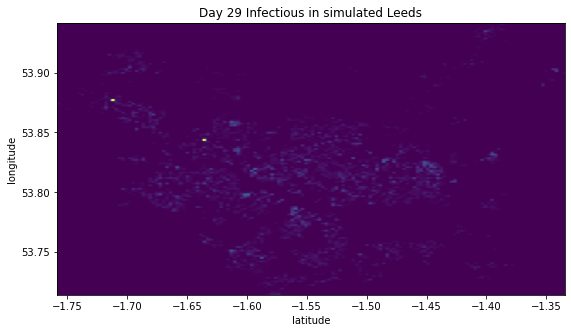

2021-01-22 22:47:53,784 INFO:Day 43, prop infected is 0.06, prop infectious is 0.0067


<Figure size 864x360 with 0 Axes>

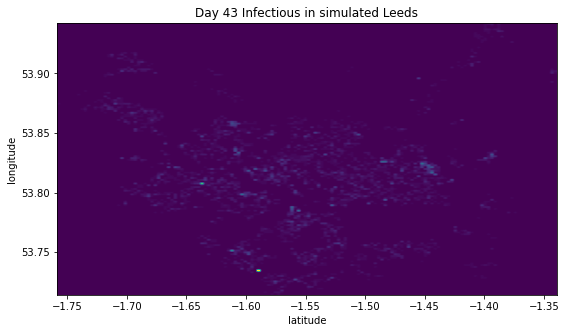

2021-01-22 22:48:25,708 INFO:Day 57, prop infected is 0.07, prop infectious is 0.0060


<Figure size 864x360 with 0 Axes>

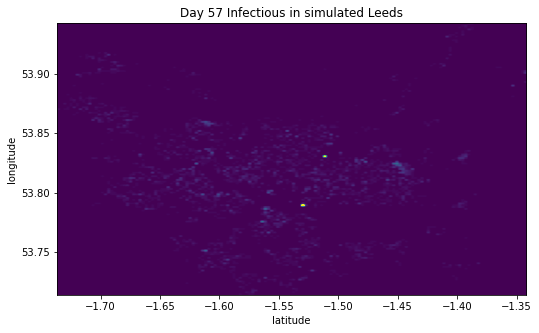

2021-01-22 22:48:57,398 INFO:Day 71, prop infected is 0.08, prop infectious is 0.0050


<Figure size 864x360 with 0 Axes>

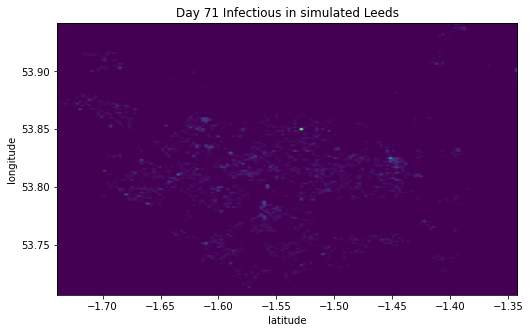

2021-01-22 22:49:33,551 INFO:Day 85, prop infected is 0.09, prop infectious is 0.0042


<Figure size 864x360 with 0 Axes>

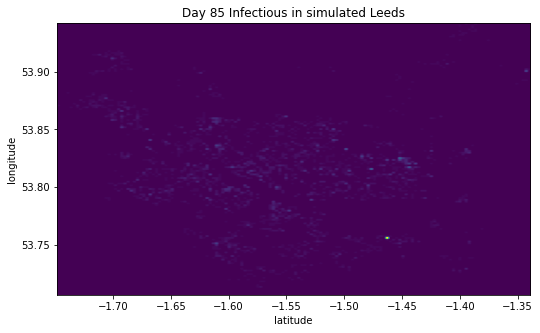

2021-01-22 22:50:05,057 INFO:Day 99, prop infected is 0.09, prop infectious is 0.0038


<Figure size 864x360 with 0 Axes>

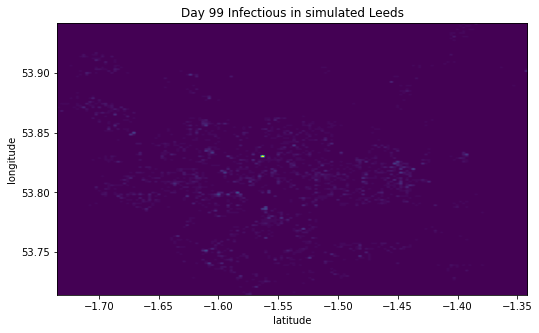

2021-01-22 22:50:35,681 INFO:Day 113, prop infected is 0.10, prop infectious is 0.0031


<Figure size 864x360 with 0 Axes>

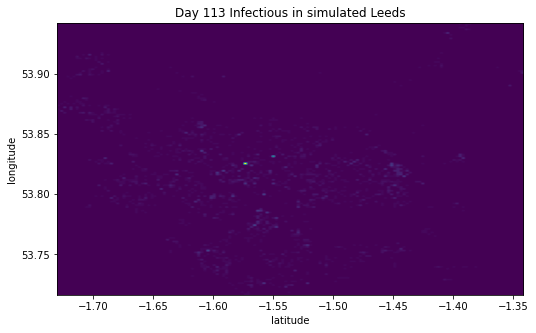

2021-01-22 22:51:06,074 INFO:Day 127, prop infected is 0.11, prop infectious is 0.0024


<Figure size 864x360 with 0 Axes>

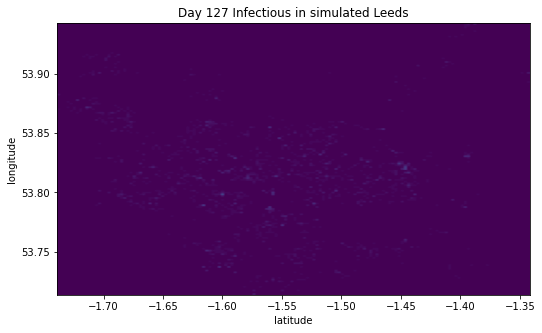

2021-01-22 22:51:36,398 INFO:Day 141, prop infected is 0.11, prop infectious is 0.0019


<Figure size 864x360 with 0 Axes>

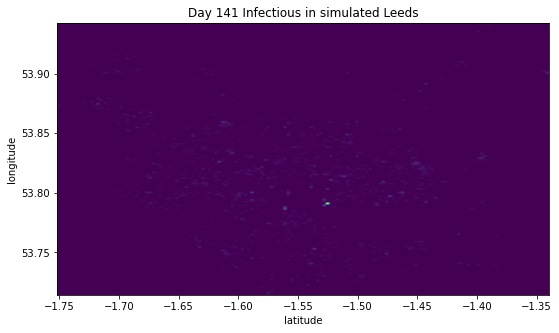

2021-01-22 22:52:06,601 INFO:Day 155, prop infected is 0.11, prop infectious is 0.0015


<Figure size 864x360 with 0 Axes>

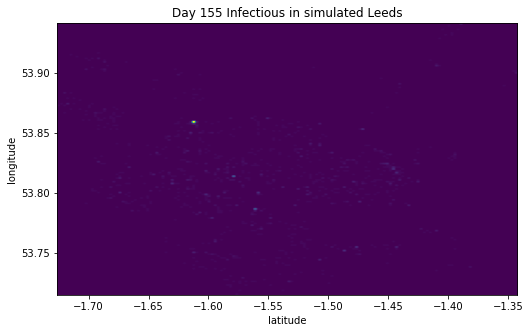

2021-01-22 22:52:36,388 INFO:Day 169, prop infected is 0.11, prop infectious is 0.0011


<Figure size 864x360 with 0 Axes>

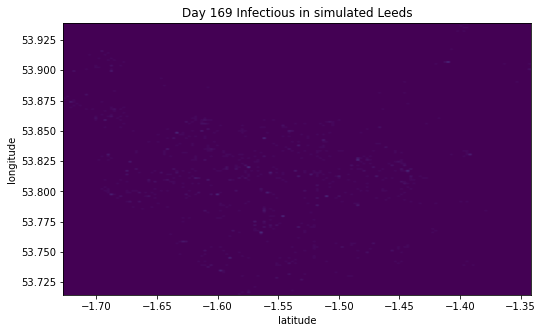

2021-01-22 22:53:06,574 INFO:Day 183, prop infected is 0.12, prop infectious is 0.0008


<Figure size 864x360 with 0 Axes>

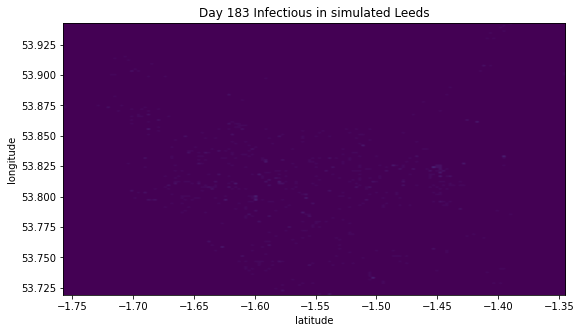

2021-01-22 22:53:41,545 INFO:Day 197, prop infected is 0.12, prop infectious is 0.0007


<Figure size 864x360 with 0 Axes>

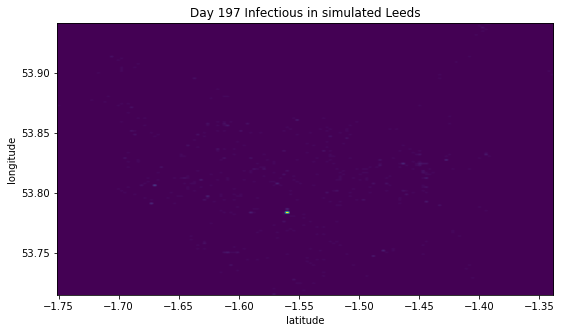

2021-01-22 22:53:50,293 INFO:Day 201, prop infected is 0.12, prop infectious is 0.0007


<Figure size 864x360 with 0 Axes>

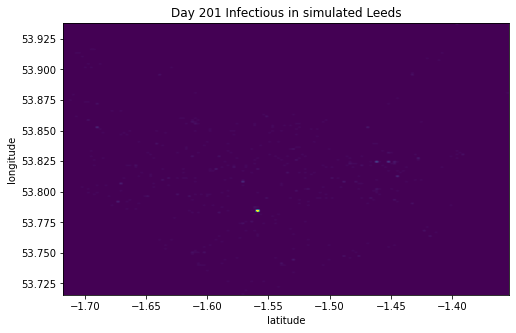

In [24]:
import society.alternatives
o_UK = Outbreak(society.alternatives.UKSociety(), Covid(), **SCALE_SETTINGS).simulate()

2021-01-22 22:53:51,113 INFO: Realized R0 of early infections is 0.97
2021-01-22 22:53:51,113 INFO: 11.8 percent of the proportion was infected during the epidemic


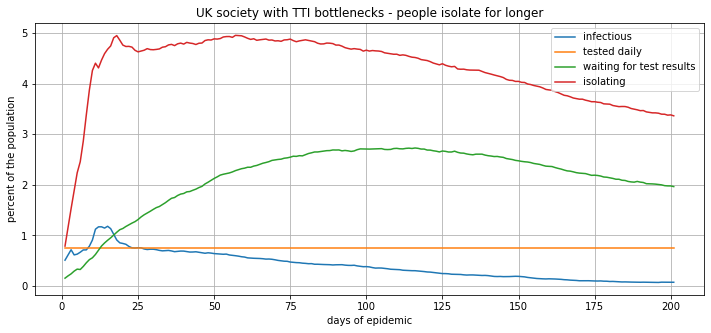

In [25]:
o_UK.plot(title='UK society with TTI bottlenecks - people isolate for longer')

2021-01-22 22:53:51,335 WARNING:Using a pre-existing population - does it have the right network structure?
2021-01-22 22:54:04,960 INFO:Day 1, prop infected is 0.01, prop infectious is 0.0051


<Figure size 864x360 with 0 Axes>

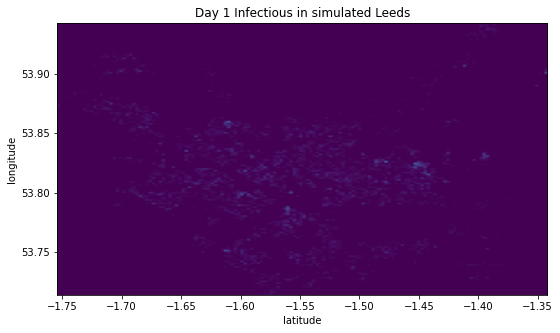

2021-01-22 22:54:42,447 INFO:Day 15, prop infected is 0.03, prop infectious is 0.0149


<Figure size 864x360 with 0 Axes>

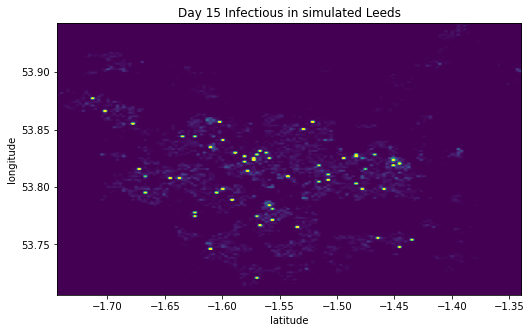

2021-01-22 22:55:27,969 INFO:Day 29, prop infected is 0.06, prop infectious is 0.0118


<Figure size 864x360 with 0 Axes>

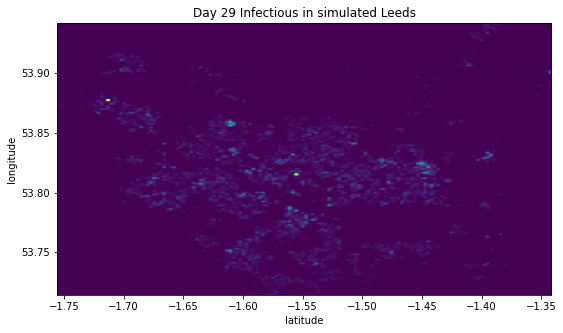

2021-01-22 22:56:12,220 INFO:Day 43, prop infected is 0.08, prop infectious is 0.0129


<Figure size 864x360 with 0 Axes>

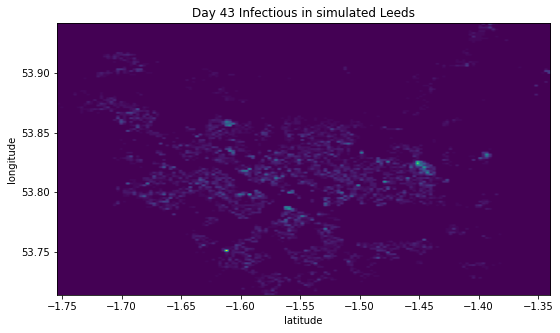

2021-01-22 22:56:56,218 INFO:Day 57, prop infected is 0.11, prop infectious is 0.0132


<Figure size 864x360 with 0 Axes>

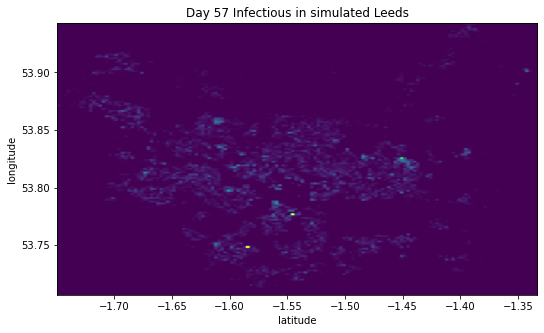

2021-01-22 22:57:39,100 INFO:Day 71, prop infected is 0.14, prop infectious is 0.0126


<Figure size 864x360 with 0 Axes>

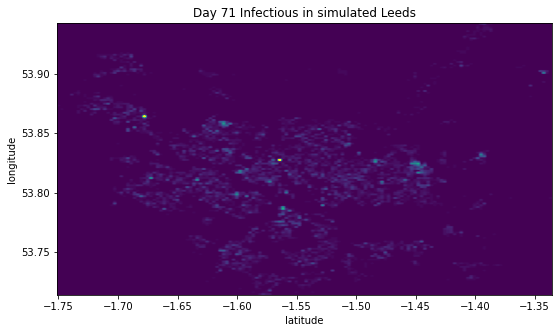

2021-01-22 22:58:21,318 INFO:Day 85, prop infected is 0.16, prop infectious is 0.0110


<Figure size 864x360 with 0 Axes>

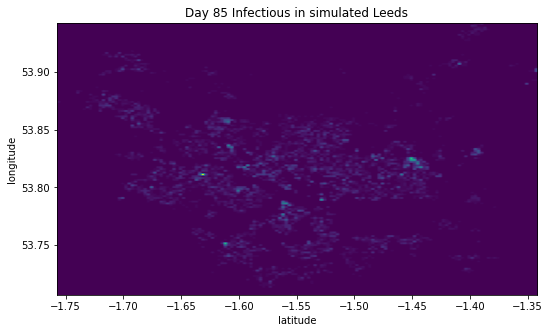

2021-01-22 22:59:07,838 INFO:Day 99, prop infected is 0.17, prop infectious is 0.0083


<Figure size 864x360 with 0 Axes>

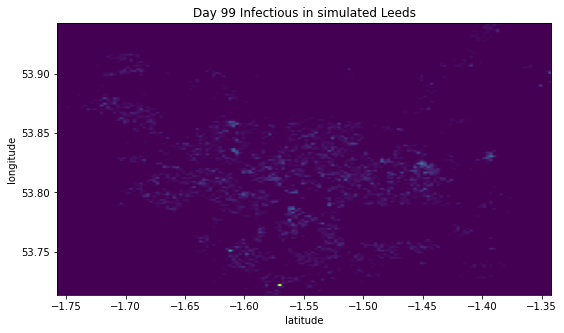

2021-01-22 22:59:48,510 INFO:Day 113, prop infected is 0.19, prop infectious is 0.0065


<Figure size 864x360 with 0 Axes>

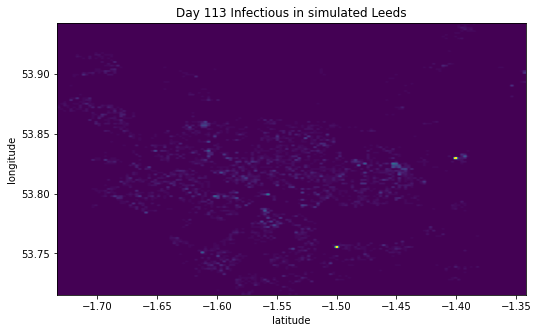

2021-01-22 23:00:27,688 INFO:Day 127, prop infected is 0.20, prop infectious is 0.0049


<Figure size 864x360 with 0 Axes>

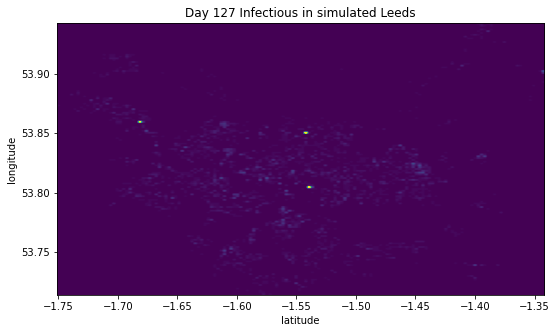

2021-01-22 23:01:04,792 INFO:Day 141, prop infected is 0.20, prop infectious is 0.0032


<Figure size 864x360 with 0 Axes>

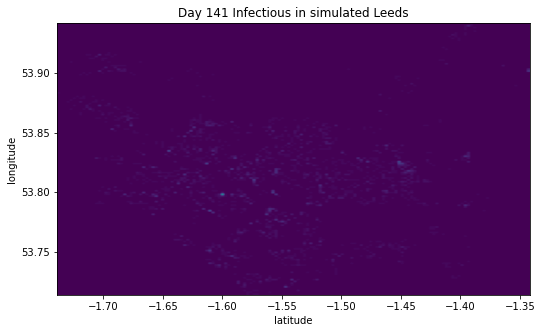

2021-01-22 23:01:40,827 INFO:Day 155, prop infected is 0.21, prop infectious is 0.0023


<Figure size 864x360 with 0 Axes>

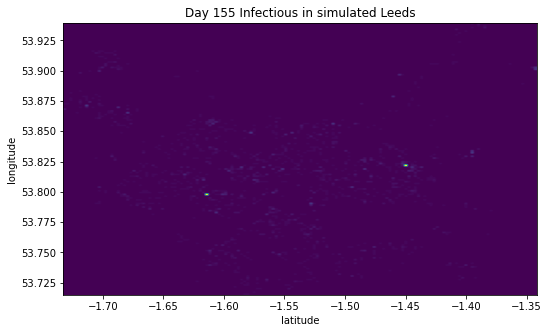

2021-01-22 23:02:16,520 INFO:Day 169, prop infected is 0.21, prop infectious is 0.0015


<Figure size 864x360 with 0 Axes>

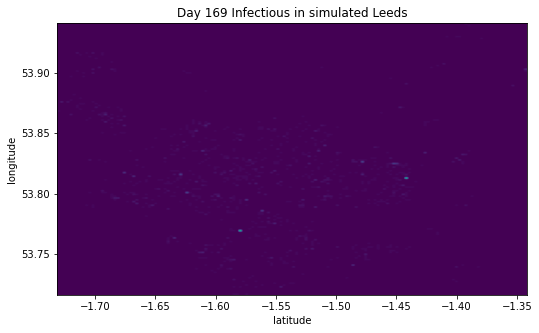

2021-01-22 23:02:50,899 INFO:Day 183, prop infected is 0.21, prop infectious is 0.0009


<Figure size 864x360 with 0 Axes>

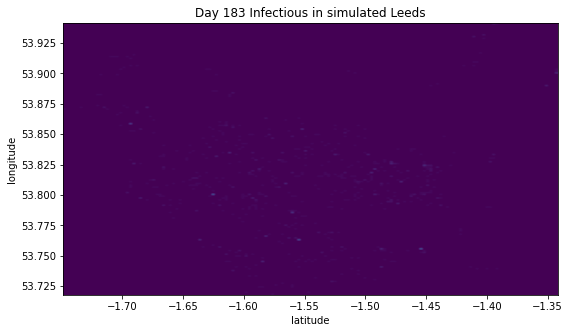

2021-01-22 23:03:31,310 INFO:Day 197, prop infected is 0.21, prop infectious is 0.0006


<Figure size 864x360 with 0 Axes>

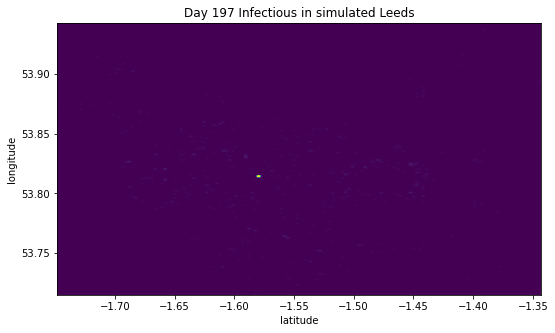

2021-01-22 23:03:41,465 INFO:Day 201, prop infected is 0.21, prop infectious is 0.0005


<Figure size 864x360 with 0 Axes>

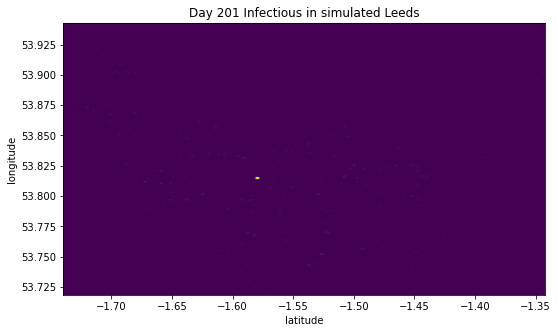

In [26]:
o_contact_test = Outbreak(society.ContactTestingSociety(), Covid(), **SCALE_SETTINGS).simulate()

2021-01-22 23:03:42,439 INFO: Realized R0 of early infections is 1.08
2021-01-22 23:03:42,440 INFO: 21.3 percent of the proportion was infected during the epidemic


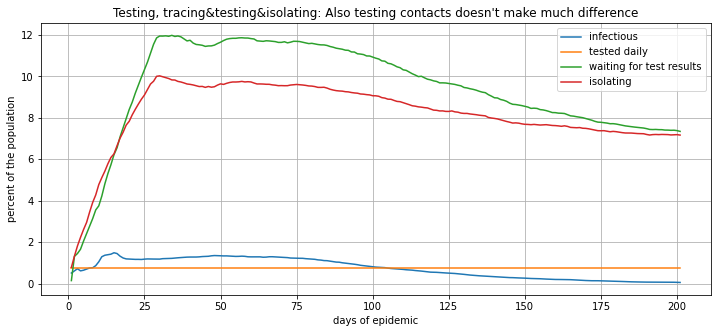

In [27]:
o_contact_test.plot(title="Testing, tracing&testing&isolating: "
                    "Also testing contacts doesn't make much difference", 
                    secondary_y=['prop_infected'])

In [28]:
infector_nets = [len(p.infector.contacts) for p in pop.people if p.infector]

In [29]:
infected_nets = [len(p.contacts) for p in pop.people if p.infected]

In [30]:
def most_connected_infector(guy):
    if guy.infector is None:
        raise NotImplementedError
    return max([len(i.contacts) for i in guy.chain() if i is not guy]) 

max_contacts_chain = [most_connected_infector(person)
                      for person in pop.people 
                      if person.infector is not None]

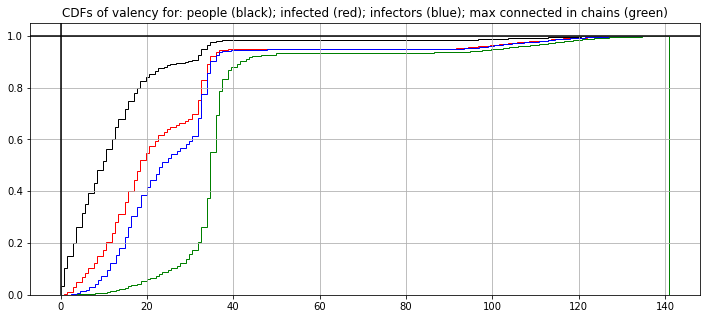

In [31]:
opts = dict(cumulative=True, bins=200, density=True, histtype='step')

plt.hist(nets, color='k', **opts)
plt.hist(infected_nets, color='r', **opts)
plt.hist(infector_nets, color='b', **opts)
plt.hist(max_contacts_chain, color='g', **opts)

plt.title("CDFs of valency for: people (black); infected (red); infectors (blue); max connected in chains (green)")
plt.axhline(1, color='k'); plt.axvline(0, color='k')
plt.grid()

In [32]:
coord = [[p.home.coordinate['lon'], p.home.coordinate['lat']] for p in pop.people if p.infected]
coord_column_list = list(zip(*coord))

<Figure size 864x360 with 0 Axes>

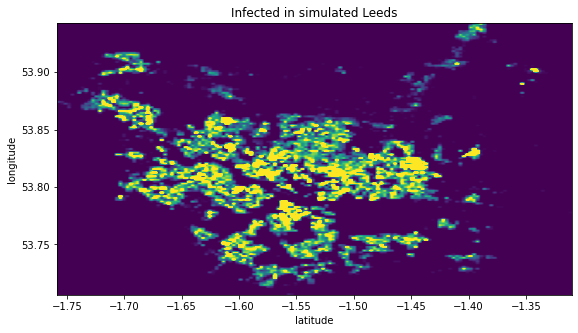

In [33]:

heatmap, xedges, yedges = np.histogram2d(coord_column_list[0], coord_column_list[1], bins=150)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]


plt.clf()
fig = plt.figure()
plt.title('Infected in simulated Leeds')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.imshow(heatmap.T, extent=extent, origin='lower', vmin=0, vmax=50)
plt.show()
fig.savefig(os.path.join(DATA_PATH, 'city','population','infected_heatmap.png'), dpi=fig.dpi)

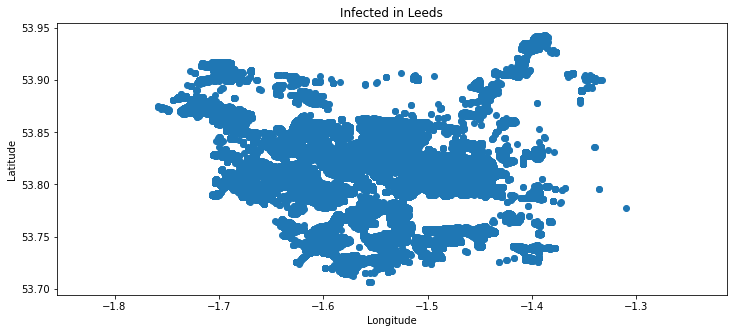

In [34]:
plt.plot(coord_column_list[0], coord_column_list[1], 'o')
plt.title('Infected in Leeds')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()